<a href="https://colab.research.google.com/github/rhdp0/Recomendacao-de-Filmes/blob/main/Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler #escalador padrão da biblioteca
# O escalador server para adicionar peso para cada característica

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [5]:
from sklearn.cluster import KMeans # Responsável pelo agrupamento ou clusterização

In [6]:
modelo = KMeans(n_clusters=3) 
# O número de clusters representa o número de grupos que o K-Means irá utilizar para alocar os dados. Esse número é o quantidade de grupos que teremos ao final da execução do algoritmo

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [1 1 0 ... 0 1 0]


In [7]:
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.026895,-0.477165,-0.269501,-0.251906,-0.270451,0.075337,-0.029248,0.094528,0.175237,-0.141788,0.033618,0.001285,-0.116578,0.000297,0.018428,0.135813,-0.317063,-0.083070,-0.015107,-0.000942
1,-0.059180,-0.105508,0.895937,2.234034,2.596032,0.254235,-0.328058,-0.201701,-0.594742,0.889810,-0.094926,-0.272231,0.191733,0.412208,-0.133861,-0.271369,0.043438,-0.469166,-0.173867,-0.081547
2,-0.059180,1.546545,0.462816,-0.167627,-0.264860,-0.346282,0.233009,-0.210704,-0.295703,0.063656,-0.064969,0.112955,0.284359,-0.178093,-0.000444,-0.310651,0.978835,0.462984,0.122251,0.038011


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f407c9f5410>,
      dtype=object)

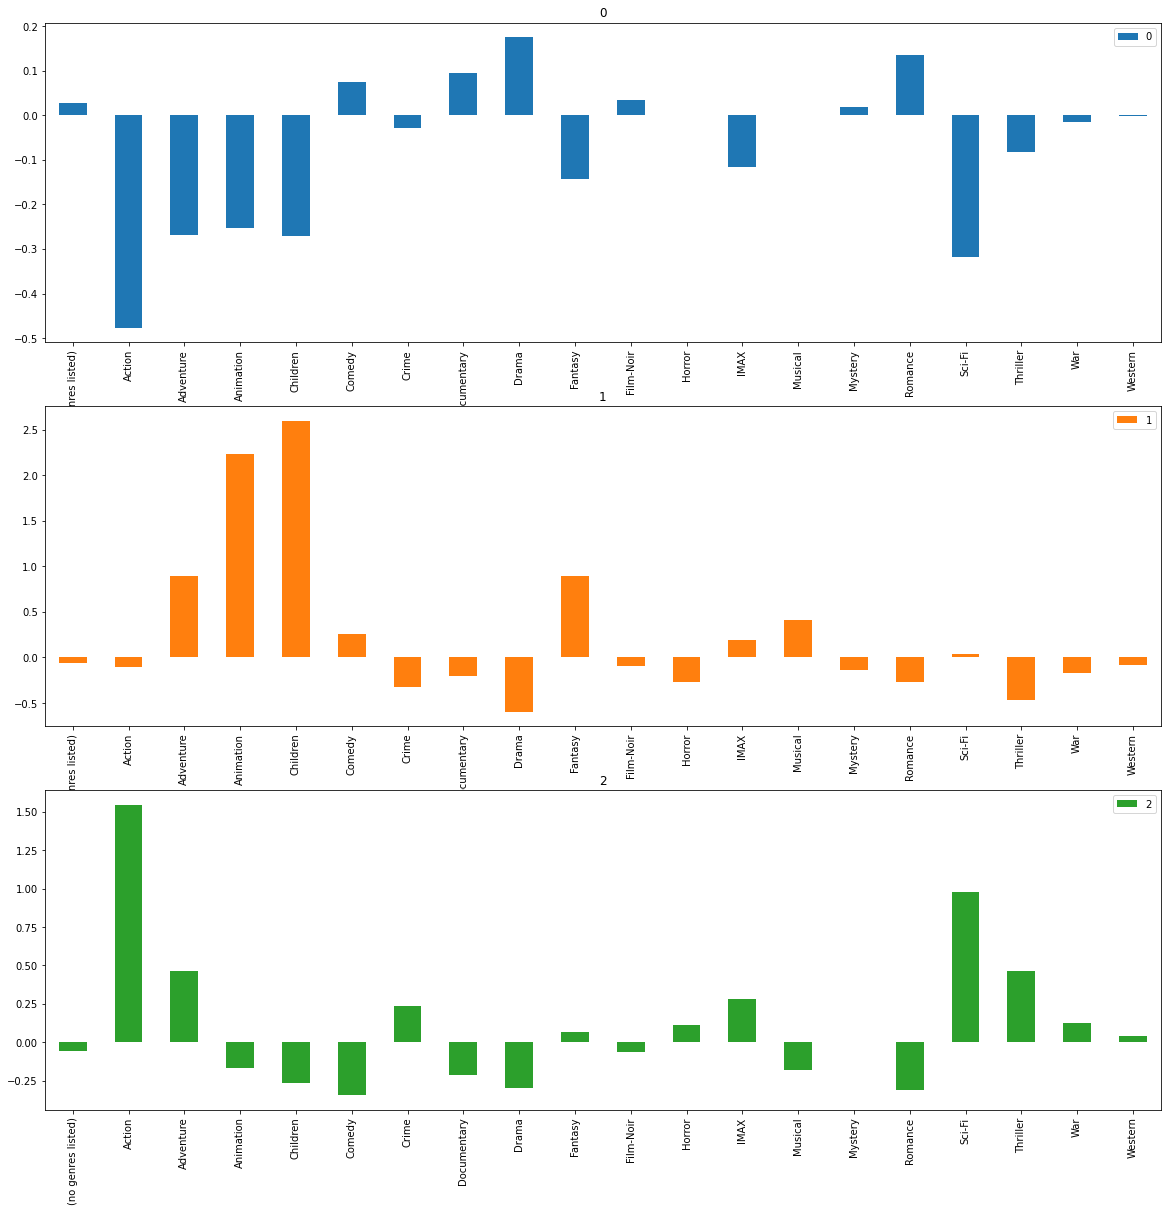

In [8]:
# A função transpose() retorna a matrix transposta (o que é linha vira coluna e o que é coluna vira linha)
grupos.transpose().plot.bar(subplots=True,
                figsize=(20,20),
                sharex=False)

In [9]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1588,2130,Atlantic City (1980),Crime|Drama|Romance,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3381,4599,Great Balls of Fire! (1989),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7775,91653,We Bought a Zoo (2011),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5133,8225,Night of the Living Dead (1990),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9191,150254,The Devil's Candy (2015),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
620,785,Kingpin (1996),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1702,2289,"Player, The (1992)",Comedy|Crime|Drama,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2553,3418,Thelma & Louise (1991),Adventure|Crime|Drama,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4135,5949,Intact (Intacto) (2001),Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5014,7772,Undercurrent (1946),Film-Noir|Thriller,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [10]:
from sklearn.manifold import TSNE #Reduz dimensionalidade

In [11]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  5.004163 ,  66.109116 ],
       [ 61.119186 , -13.165702 ],
       [  1.5198096,  40.498688 ],
       ...,
       [ 10.278695 ,  12.407867 ],
       [ 31.20503  , -16.008745 ],
       [ -3.8253644, -27.729769 ]], dtype=float32)

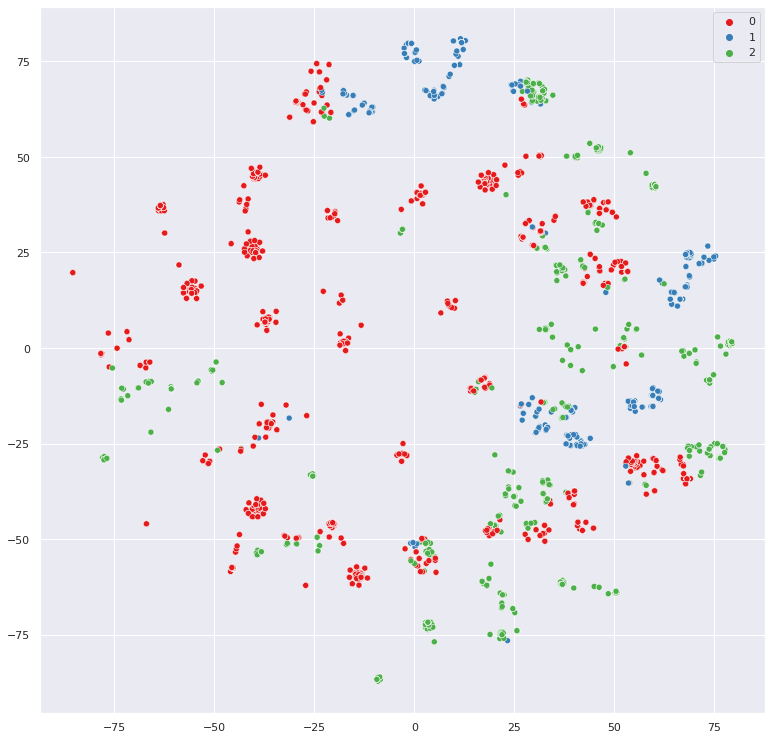

In [12]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13,13)})

sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f407773f950>,
      dtype=object)

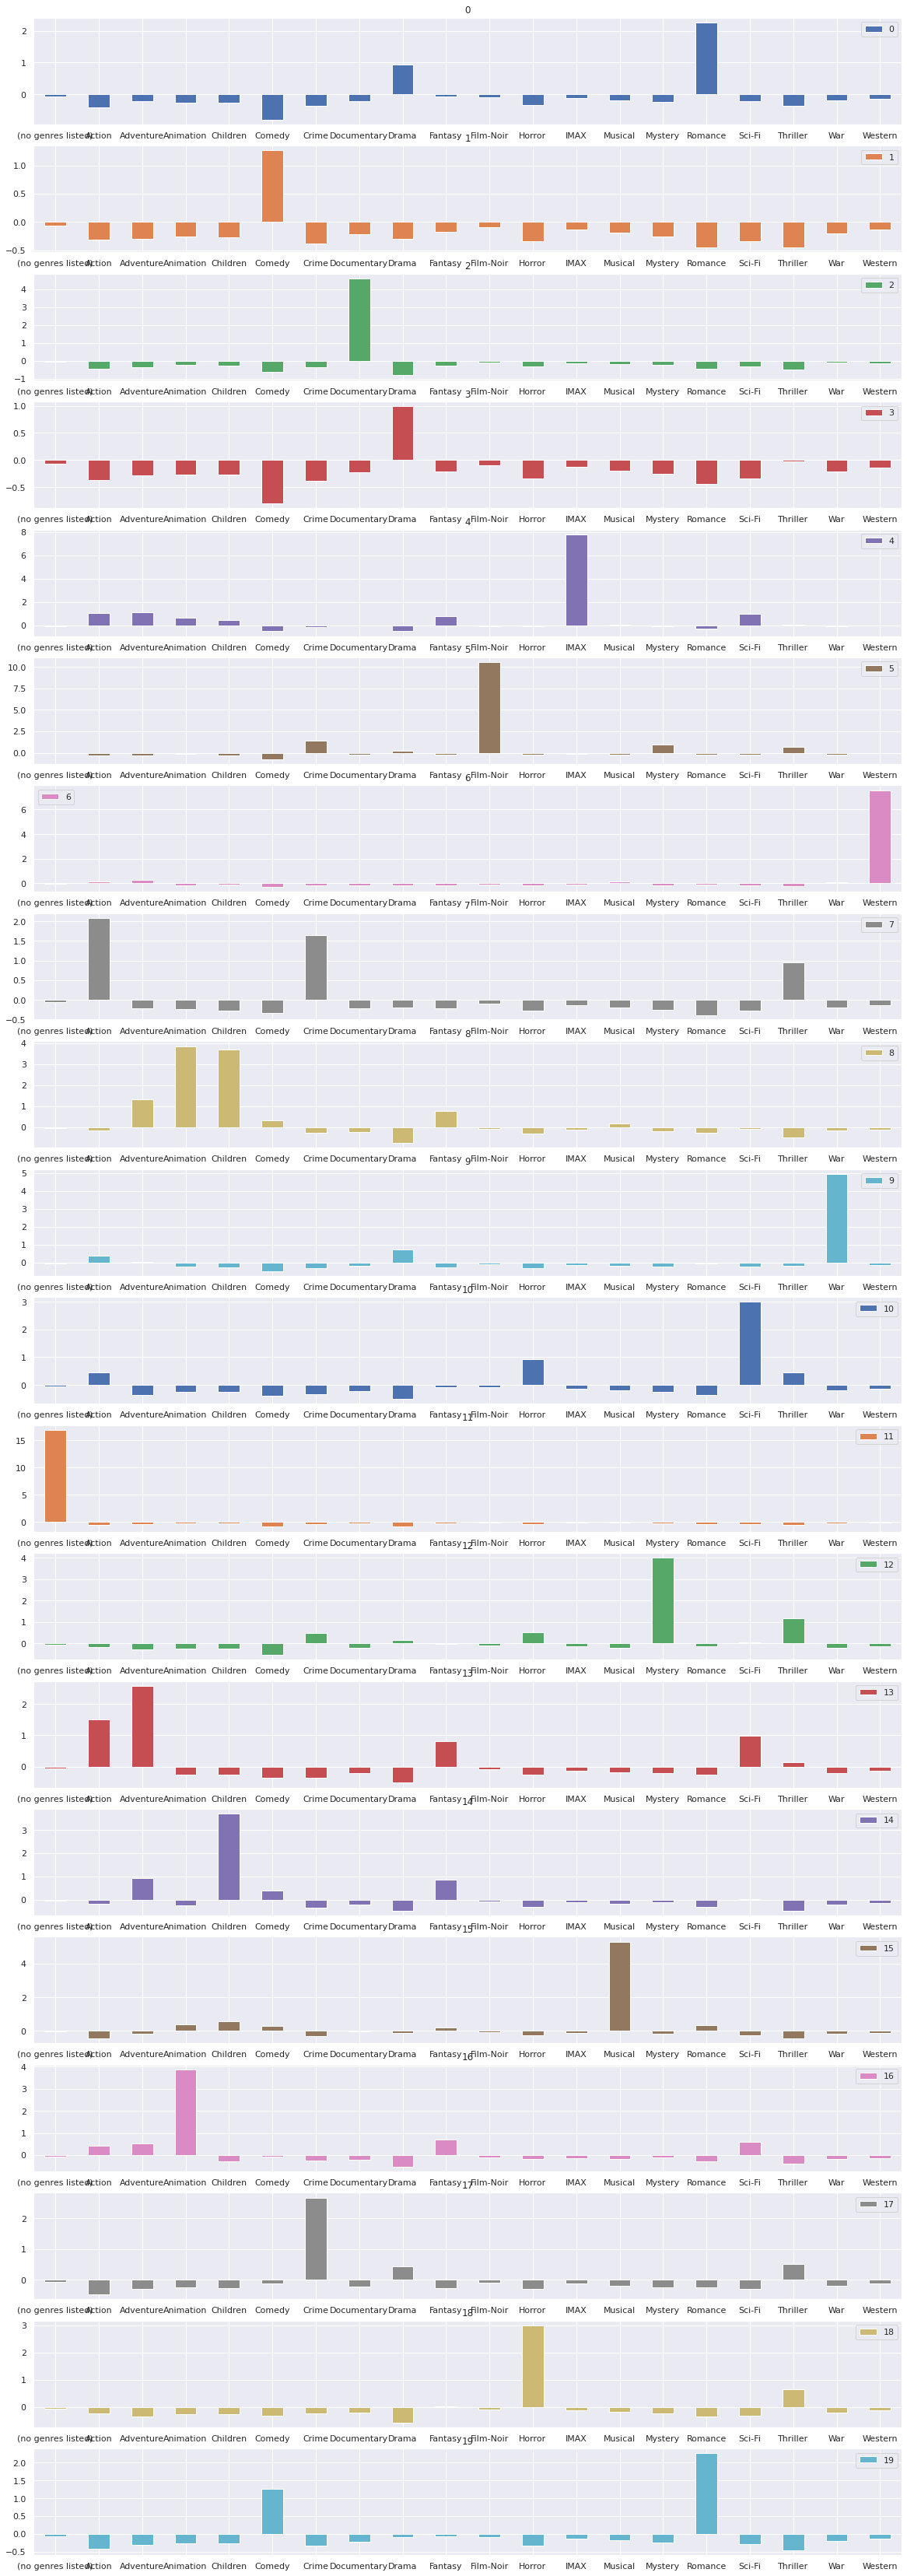

In [30]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                figsize=(20,60),
                sharex=False,
                rot=0)

In [14]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7055,69394,"Stoning of Soraya M., The (2008)",Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6490,53129,Mr. Brooks (2007),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3388,4611,Johnny Handsome (1989),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2891,3868,"Naked Gun: From the Files of Police Squad!, Th...",Action|Comedy|Crime|Romance,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1717,2307,One Tough Cop (1998),Action|Crime,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5305,8798,Collateral (2004),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
7638,87869,Horrible Bosses (2011),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3870,5442,V. I. Warshawski (1991),Action|Comedy|Crime,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4436,6552,Dirty Pretty Things (2002),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
246,284,New York Cop (Nyû Yôku no koppu) (1993),Action|Crime,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [16]:
kmeans(20, generos_escalados)

[20, 56489.00953667622]

In [17]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1,41)]
resultado

[[1, 194840.0],
 [2, 179774.345396859],
 [3, 168655.17702194562],
 [4, 155846.52826201878],
 [5, 146288.5807649627],
 [6, 138500.45744079872],
 [7, 128791.60661157304],
 [8, 119813.71601324322],
 [9, 109801.1298792384],
 [10, 101219.14083366413],
 [11, 95838.16449398172],
 [12, 85059.52306855495],
 [13, 79561.84545936457],
 [14, 74633.602277964],
 [15, 69213.21269506181],
 [16, 64188.128720109045],
 [17, 62301.43315121604],
 [18, 59084.94979842326],
 [19, 56599.10250433693],
 [20, 56150.28573573368],
 [21, 53891.55398022514],
 [22, 52435.21302991897],
 [23, 50812.75408847025],
 [24, 49701.57651032287],
 [25, 47947.849744275554],
 [26, 47500.59576486949],
 [27, 46342.44695216115],
 [28, 45033.97476641602],
 [29, 43274.65349252137],
 [30, 42394.63419060985],
 [31, 41384.16614891995],
 [32, 40856.19441657079],
 [33, 39784.80365581942],
 [34, 38675.622826138395],
 [35, 38949.63618565503],
 [36, 38471.09992170306],
 [37, 36400.39088386706],
 [38, 36305.87791927866],
 [39, 35758.66850888636]

In [18]:
resultado = pd.DataFrame(resultado,
             columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179774.345397
2,3,168655.177022
3,4,155846.528262
4,5,146288.580765
5,6,138500.457441
6,7,128791.606612
7,8,119813.716013
8,9,109801.129879
9,10,101219.140834


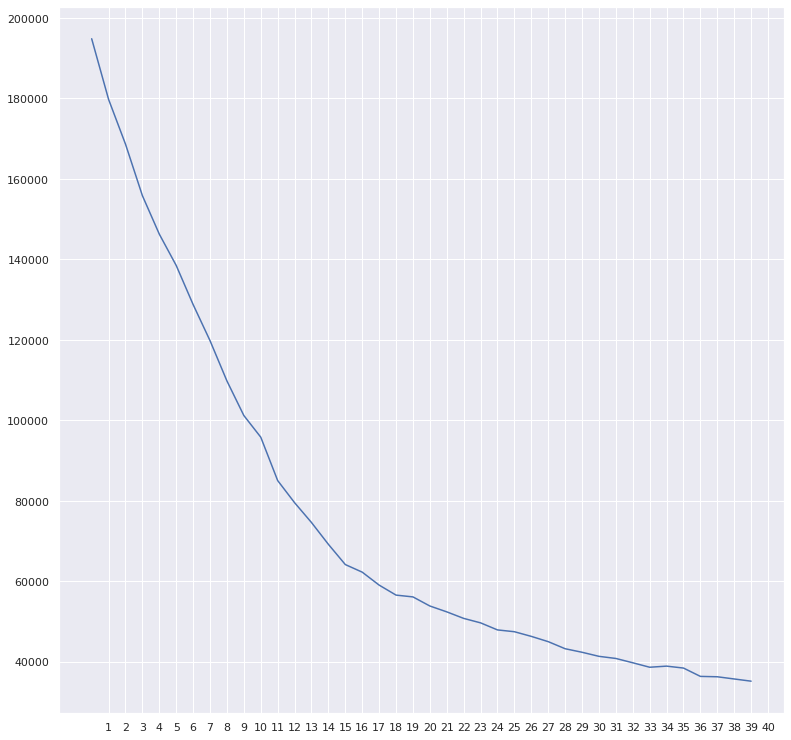

In [19]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4078b48890>,
      dtype=object)

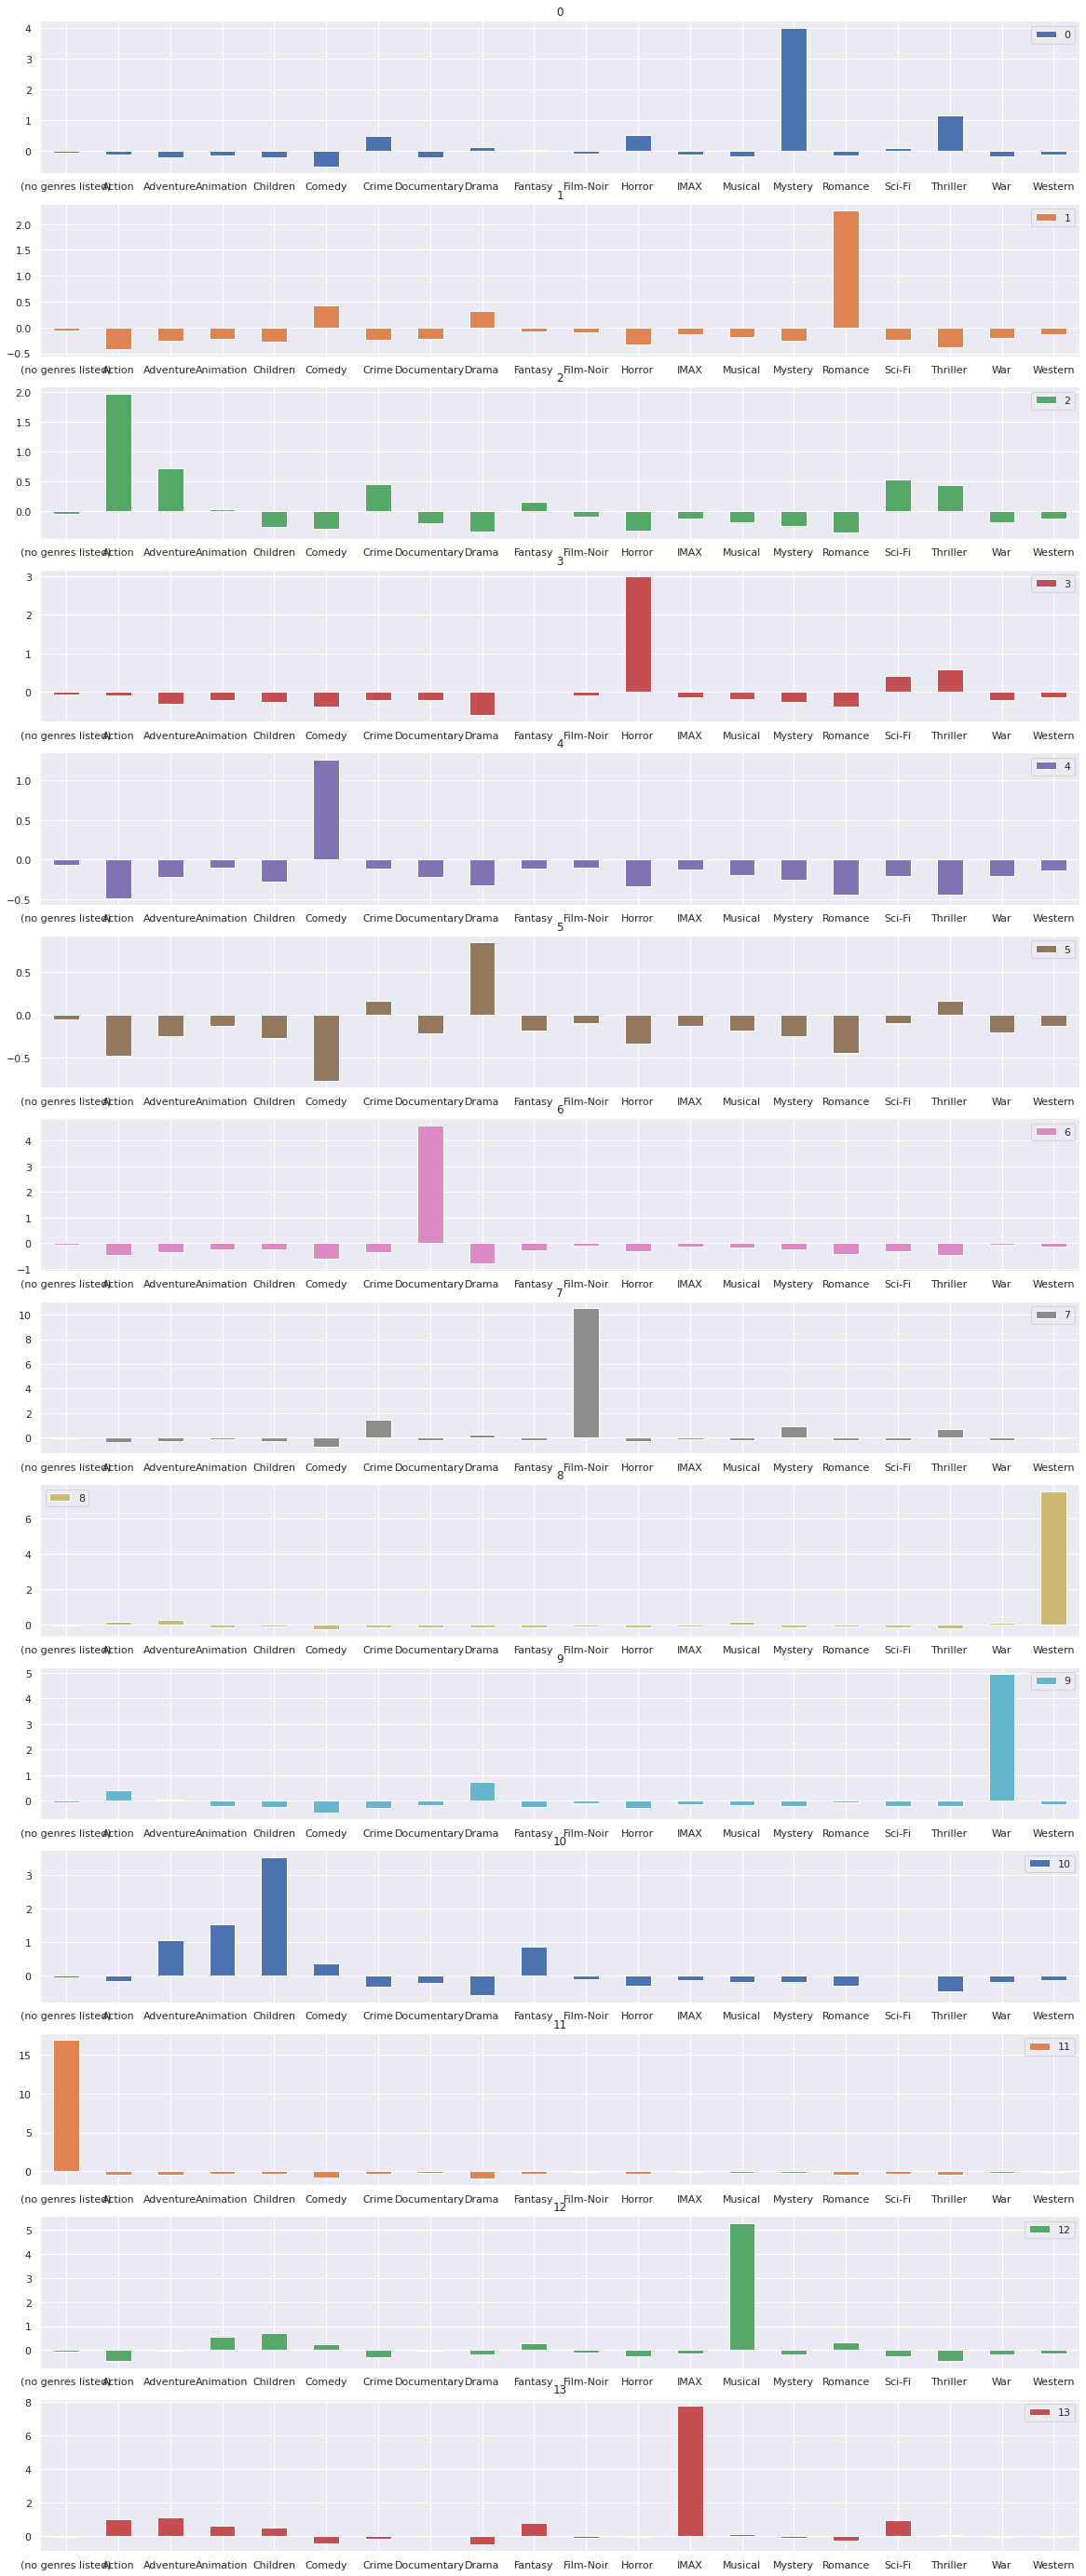

In [20]:

modelo = KMeans(n_clusters=14)
modelo.fit(generos_escalados)


grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                figsize=(20,50),
                sharex=False,
                rot=0)

In [21]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2438,3251,Agnes of God (1985),Drama|Mystery,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2879,3849,The Spiral Staircase (1945),Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4250,6197,Spider (2002),Drama|Mystery,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5059,7930,"People Under the Stairs, The (1991)",Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
612,775,Spirits of the Dead (1968),Horror|Mystery,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7086,70159,Orphan (2009),Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
693,911,Charade (1963),Comedy|Crime|Mystery|Romance|Thriller,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0
7562,85414,Source Code (2011),Action|Drama|Mystery|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
6276,47610,"Illusionist, The (2006)",Drama|Fantasy|Mystery|Romance,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0
4381,6424,Oscar (1991),Comedy|Crime|Mystery|Romance,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0


In [22]:
from sklearn.cluster import AgglomerativeClustering #Monta uma "árvore de decisão" de baixo para cima

In [23]:
modelo = AgglomerativeClustering(n_clusters=14)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5,  0, 13, ...,  2,  5,  2])

In [24]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-37.10935  , -15.550943 ],
       [ 52.915955 ,  29.489754 ],
       [ 26.099901 , -32.67987  ],
       ...,
       [-22.394312 ,   3.0213842],
       [-23.80627  , -32.09439  ],
       [ 14.339734 ,  -2.5577314]], dtype=float32)

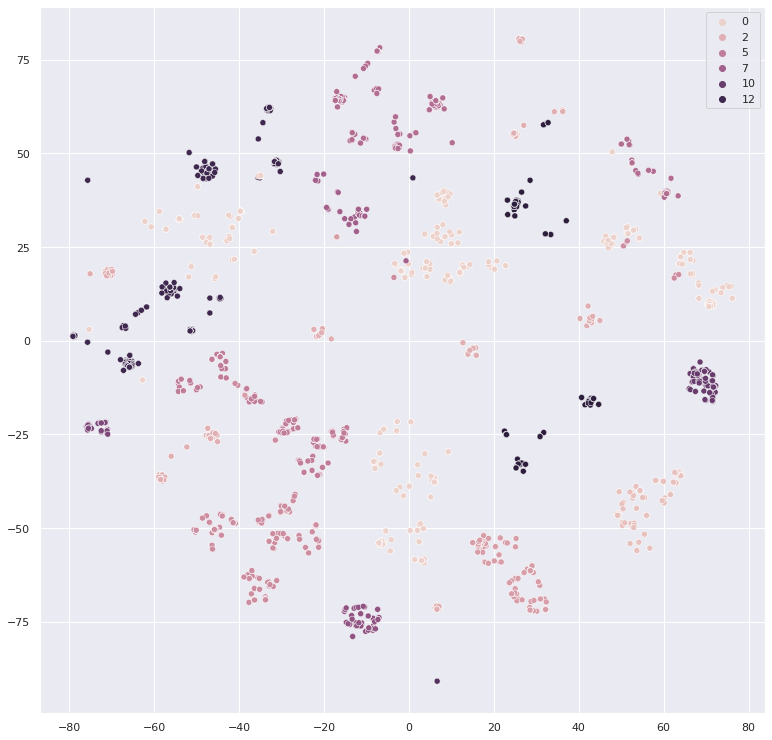

In [25]:
sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos)

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f407815e050>,
      dtype=object)

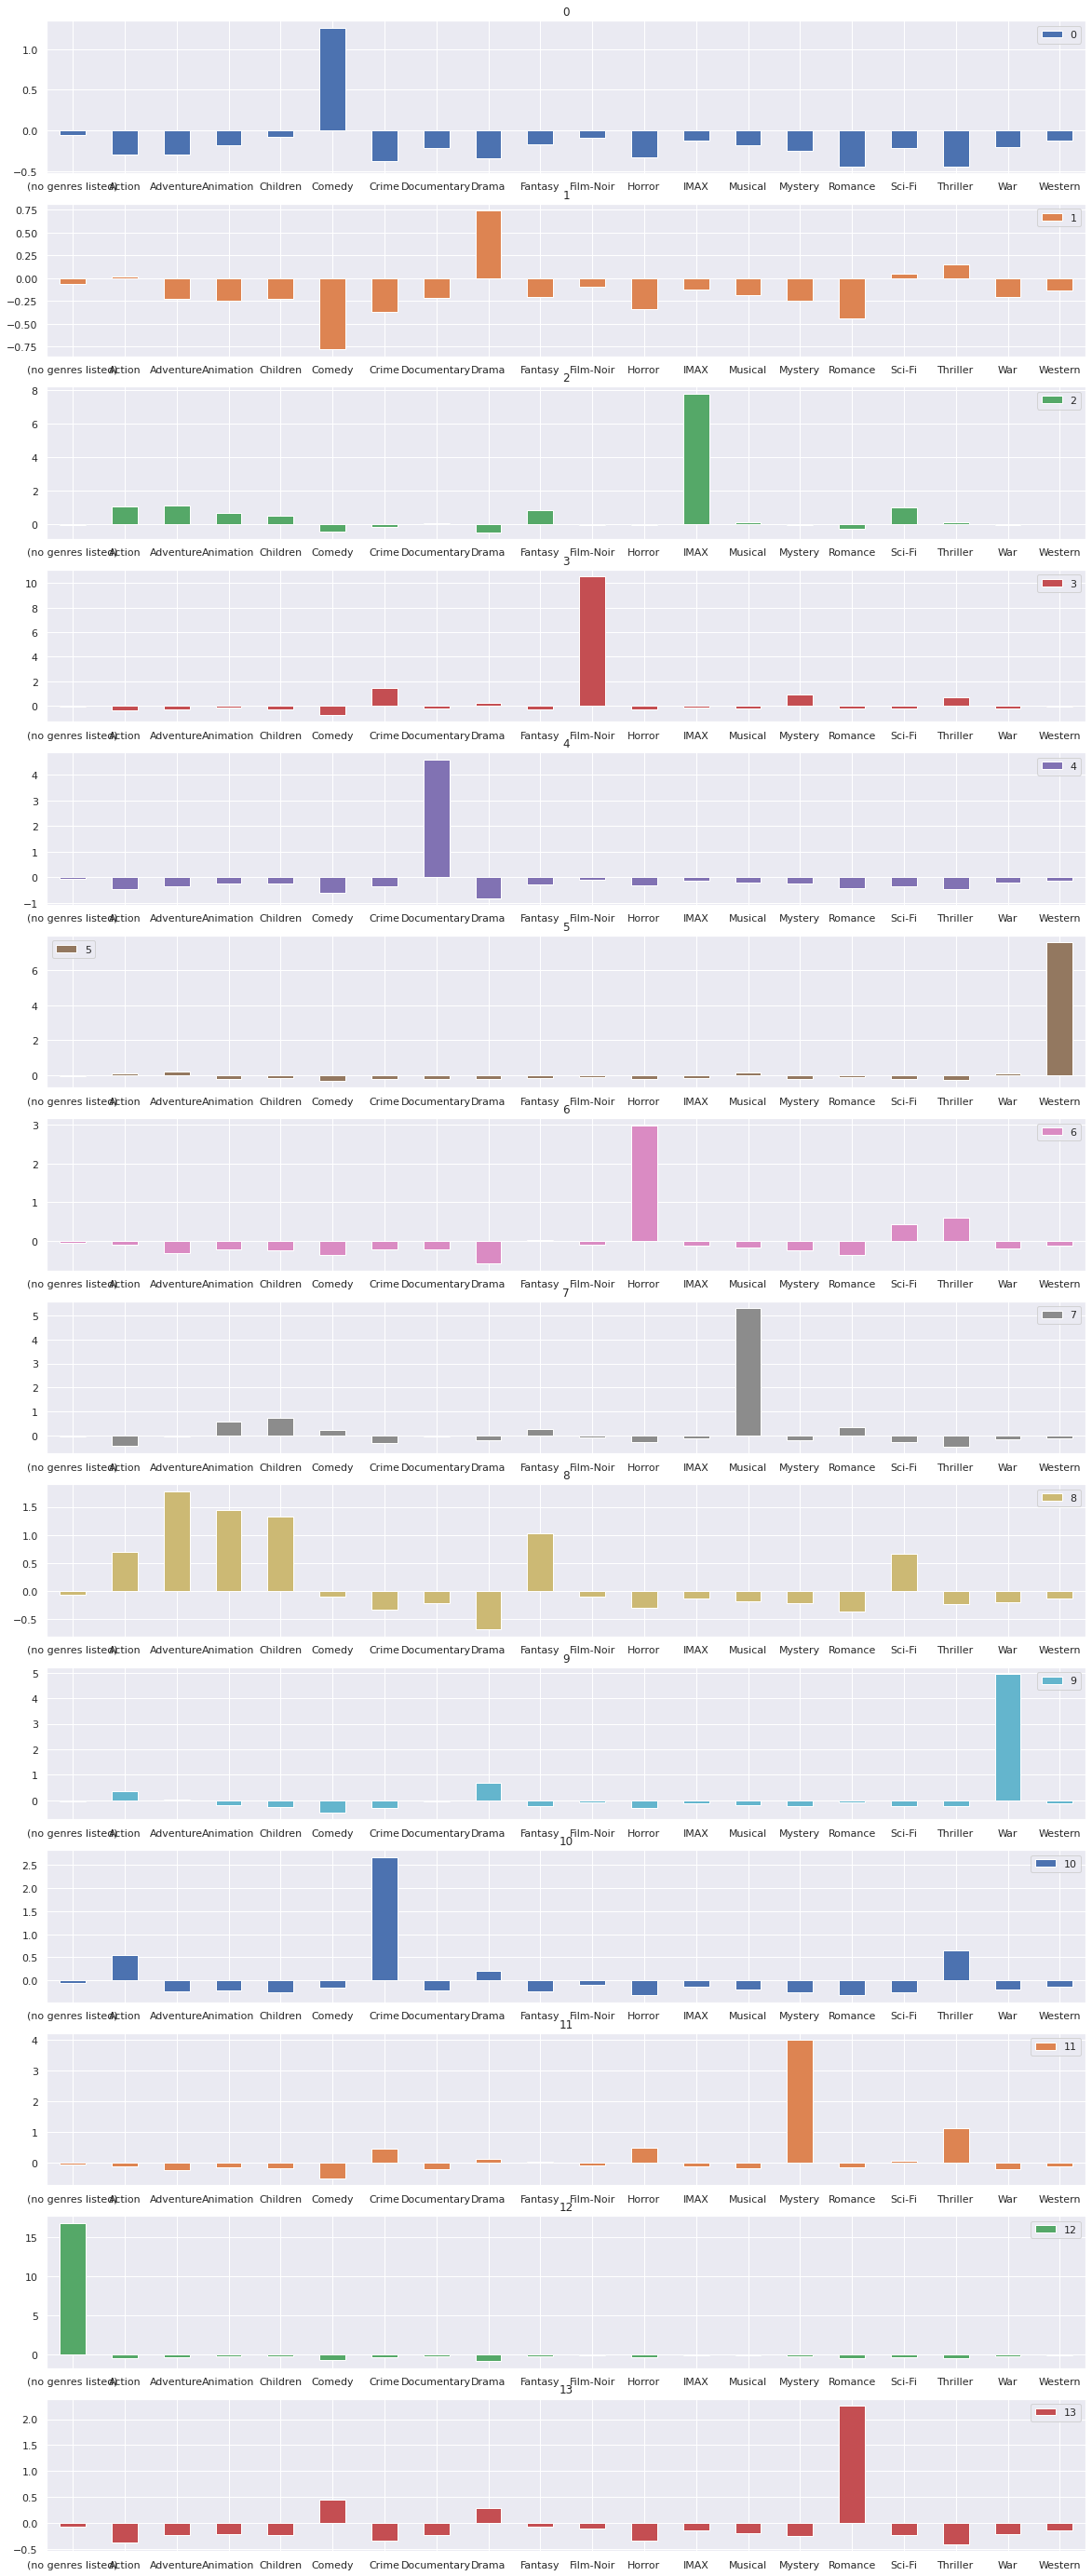

In [27]:
modelo = KMeans(n_clusters=14)
modelo.fit(generos_escalados)


grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                figsize=(20,50),
                sharex=False,
                rot=0)

In [28]:
#Por esse tipo de algoritmo, conseguimos definir modelos que agrupam nossos dados definindo uma hierarquia entre eles
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 0.        ,  1.        ,  2.42745644,  2.        ],
       [13.        , 14.        ,  2.90067374,  3.        ],
       [10.        , 15.        ,  3.25110493,  4.        ],
       [ 6.        , 16.        ,  3.66984093,  5.        ],
       [ 8.        , 17.        ,  3.76027548,  6.        ],
       [11.        , 18.        ,  4.58678725,  7.        ],
       [ 4.        , 19.        ,  5.13833437,  8.        ],
       [ 9.        , 20.        ,  5.21689874,  9.        ],
       [ 7.        , 21.        ,  5.77769469, 10.        ],
       [ 5.        , 22.        ,  7.82887673, 11.        ],
       [ 2.        , 23.        ,  8.07776696, 12.        ],
       [ 3.        , 24.        , 10.81716857, 13.        ],
       [12.        , 25.        , 17.06058878, 14.        ]])

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 2.4274564368631446, 2.4274564368631446, 0.0],
  [0.0, 2.9006737367157767, 2.9006737367157767, 2.4274564368631446],
  [0.0, 3.2511049266560086, 3.2511049266560086, 2.9006737367157767],
  [0.0, 3.6698409261596123, 3.6698409261596123, 3.2511049266560086],
  [0.0, 3.760275479746421, 3.760275479746421, 3.6698409261596123],
  [0.0, 4.586787251589388, 4.586787251589388, 3.760275479746421],
  [0.0, 5.138334371046091, 5.138334371046091, 4.586787251589388],
  [0.0, 5.216898744828179, 5.216898744828179, 5.138334371046091],
  [0.0, 5.7776946869835575, 5.7776946869835575, 5.216898744828179],
  [0.0, 7.8288767337305, 7.8288767337305, 5.7776946869835575],
  [0.0, 8.077766955462831, 8.077766955462831, 7.8288767337305],
  [0.0, 10.817168573830244, 10.817168573830244, 8.077766955462831],
  [0.0, 17.060588780137845, 17.060588780137845, 10.817168573830244]],
 'icoord': [[125.0, 125.0

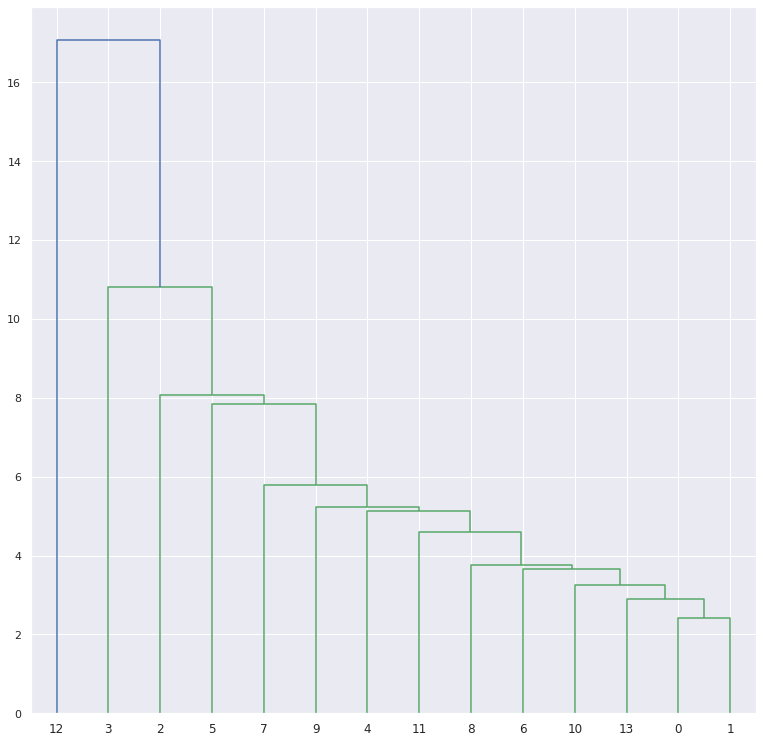

In [29]:
dendograma = dendrogram(matriz_de_distancia)
dendograma